# load graphml and xlsx data

In [1]:
import pandas as pd
import sys
from flowmater.graph_util import draw_graph
from flowmater.ExperimentManager import ExperimentManager

In [3]:
#init class
em=ExperimentManager()

#load databases
em.load_experiments("example_database/db1")
em.load_experiments("example_database/db2")

#process
em.classify_experiments()

In [4]:
#show
df=pd.DataFrame.from_dict(em.database).T
df

,Chemical_A_SMILES,Chemical_A,Chemical_B_SMILES,Chemical_B,Chemical_C_SMILES,Chemical_C,"Measure_thickness, Electrolyte thickness, um","Proc_1st_heat, Heat, oC","Proc_take_material, Take, mg","Proc_make_cell, Make cell, kN","Proc_anneal_before_meas, Wait, hours","Measure_EIS, AC conductivity, S/cm","Proc_meas_temp, Heat, oC",graphID,"Proc_pre_heat, Heat, oC"
example_database/db1\chart_0,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.01,25,0,NaN
example_database/db1\chart_1,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.03,50,0,NaN
example_database/db1\chart_2,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.05,70,0,NaN
example_database/db1\chart_3,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.07,80,0,NaN
example_database/db1\chart_4,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.1,100,0,NaN
example_database/db1\chart2_0,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,0.3,25,0,NaN
example_database/db1\chart2_1,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,12,80,0,NaN
example_database/db1\chart2_2,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,10,100,0,NaN
example_database/db2\chart3_0,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,1,25,1,120
example_database/db2\chart3_1,CC(=O)C,1234,ClC(Cl)(Cl)C,1,[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,2,350,120,120,20,12,2,60,1,120


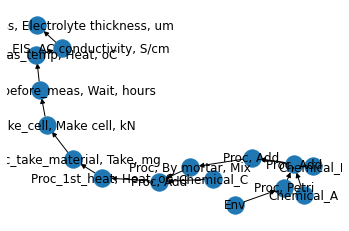

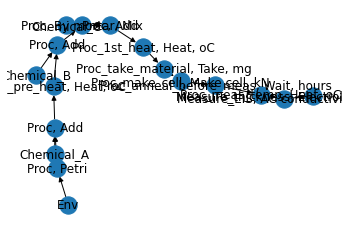

In [5]:
#show flowcharts
draw_graph(em.graph_list[0])
draw_graph(em.graph_list[2])